In [ ]:
# To better understand how variables such as Hours_Worked_Per_Week, Productivity_Score, and Employment_Type affect 
# Well_Being_Score, the test will be visualized using a pair plot.

In [100]:
import os 

In [102]:
from pathlib import Path  
import pandas as pd  

# Define the file path
file_path = Path('C:/Users/ava/Downloads/archive (67).zip')

# Read the data
data = pd.read_csv(file_path)


In [104]:
data['Employment_Type_Encoded'] = data['Employment_Type'].map({'Remote': 0, 'In-Office': 1})

In [106]:
print(data.head())

   Employee_ID Employment_Type  Hours_Worked_Per_Week  Productivity_Score  \
0            1          Remote                     29                  75   
1            2       In-Office                     45                  49   
2            3          Remote                     34                  74   
3            4          Remote                     25                  81   
4            5          Remote                     50                  70   

   Well_Being_Score  Employment_Type_Encoded  
0                78                        0  
1                47                        1  
2                89                        0  
3                84                        0  
4                74                        0  


In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

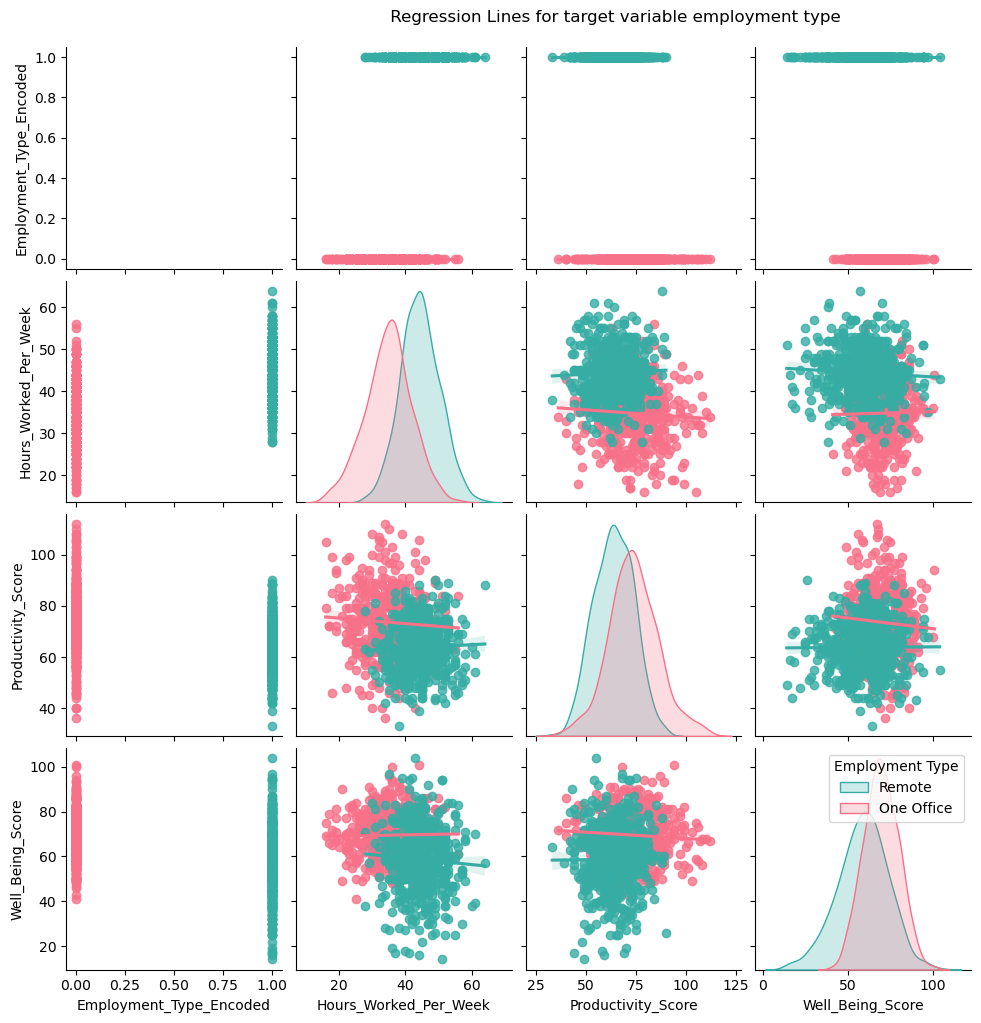

Coefficients: [-10.34311591  -0.09645701  -0.01616481]
Intercept: 74.24351283427023
Mean Squared Error: 170.4250855274097
Mean Squared Error: 170.4250855274097


In [112]:
data['Employment_Type_Encoded_Label'] = data['Employment_Type_Encoded'].map({0: 'Remote', 1: 'One Office'}) 

pair_plot = sns.pairplot(
    data,
    vars=['Employment_Type_Encoded', 'Hours_Worked_Per_Week', 'Productivity_Score', 'Well_Being_Score'],
    kind='reg',
    hue='Employment_Type_Encoded_Label',  # Set hue for coloring
    palette='husl',  # Apply the 'husl' color palette
    hue_order=['Remote', 'One Office']
)


# title to the pair plot
pair_plot.fig.suptitle(" Regression Lines for target variable employment type ", y=1.02)
plt.legend(title='Employment Type', labels=['Remote', 'One Office'])

# Remove the legend to not have 2 legends 
pair_plot._legend.remove()

plt.show()  # Display the plot

# Defining dependent and independent variables
X = data[['Employment_Type_Encoded', 'Hours_Worked_Per_Week', 'Productivity_Score']]  # Features
y = data['Well_Being_Score']  # Target variable

# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Linear Regression model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = LinReg.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# print coefficients, intercept, and Mean Squared Error
print("Coefficients:", LinReg.coef_)
print("Intercept:", LinReg.intercept_)
print(f'Mean Squared Error: {mse}')
print(f'Mean Squared Error: {mse}')

In [ ]:
#  negative cofficent , indicating that increases in these features are associated with a decrease in the 'well being score'.